In [160]:
from pyforest import *
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics

In [161]:
ama = pd.read_csv('Amazon.csv')
flip = pd.read_csv('Flipkart.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
ama.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637,8184958455,340
4,My Story,by Kamala Das,4.5,42,8172238975,178


In [163]:
ama.describe()

,amazon_isbn-10,amazon_price
count,1.382000e+03,1382.000000
mean,7.758529e+09,247.516643
std,2.643135e+09,151.366570
min,1.250006e+09,1.000000
25%,8.172235e+09,135.250000
50%,8.192911e+09,213.000000
75%,9.352865e+09,320.000000
max,9.960900e+09,895.000000


In [164]:
ama.info()
print('-----------------------------------------------------------------')
flip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
amazon_title            1382 non-null object
amazon_author           1382 non-null object
amazon_rating           1378 non-null object
amazon_reviews count    1378 non-null object
amazon_isbn-10          1382 non-null int64
amazon_price            1382 non-null int64
dtypes: int64(2), object(4)
memory usage: 64.9+ KB
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
flipkart_author           1381 non-null object
flipkart_isbn10           1382 non-null int64
flipkart_title            1382 non-null object
flipkart_ratings count    1382 non-null object
flipkart_price            1382 non-null int64
flipkart_stars            1382 non-null object
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [165]:
print(ama.shape)
print(flip.shape)

(1382, 6)
(1382, 6)


In [166]:
print(ama.isnull().sum().sum())
print(flip.isnull().sum().sum())

8
1


In [167]:
flip.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,John Boyne,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [168]:
flip.describe()

,flipkart_isbn10,flipkart_price
count,1.382000e+03,1382.000000
mean,7.758529e+09,263.436324
std,2.643135e+09,210.164006
min,1.250006e+09,30.000000
25%,8.172235e+09,149.250000
50%,8.192911e+09,220.000000
75%,9.352865e+09,320.000000
max,9.960900e+09,5201.000000


In [169]:
ama_flip = pd.concat([ama, flip],axis=1)
ama_flip.head()

<IPython.core.display.Javascript object>

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134,1862305277,350,John Boyne,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156,9350294311,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Mossad,by Michael Bar-Zohar - Import,4.6,637,8184958455,340,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,My Story,by Kamala Das,4.5,42,8172238975,178,Kamala Das,8172238975,MY STORY,322,178,4.3


In [170]:
ama_flip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 12 columns):
amazon_title              1382 non-null object
amazon_author             1382 non-null object
amazon_rating             1378 non-null object
amazon_reviews count      1378 non-null object
amazon_isbn-10            1382 non-null int64
amazon_price              1382 non-null int64
flipkart_author           1381 non-null object
flipkart_isbn10           1382 non-null int64
flipkart_title            1382 non-null object
flipkart_ratings count    1382 non-null object
flipkart_price            1382 non-null int64
flipkart_stars            1382 non-null object
dtypes: int64(4), object(8)
memory usage: 129.7+ KB


In [171]:
ama_flip.drop(columns=['amazon_author','amazon_title','amazon_rating','amazon_reviews count','amazon_isbn-10','flipkart_ratings count','flipkart_stars'], inplace=True)

In [172]:
ama_flip.head()   #isbn10 is same for both amazon and flipkart. So we can drop a column either from flipkart or amazon. 

,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_price
0,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,209
1,350,John Boyne,1862305277,The Boy in the Striped Pyjamas,372
2,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,477
3,340,Bar-Zohar Michael,8184958455,Mossad,280
4,178,Kamala Das,8172238975,MY STORY,178


In [173]:
ama_flip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 5 columns):
amazon_price       1382 non-null int64
flipkart_author    1381 non-null object
flipkart_isbn10    1382 non-null int64
flipkart_title     1382 non-null object
flipkart_price     1382 non-null int64
dtypes: int64(3), object(2)
memory usage: 54.1+ KB


In [174]:
ama_flip.rename(columns={'flipkart_author':'Author', 'flipkart_isbn10':'BN', 'flipkart_title':'Title'}, inplace=True)
ama_flip.head()

,amazon_price,Author,BN,Title,flipkart_price
0,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,209
1,350,John Boyne,1862305277,The Boy in the Striped Pyjamas,372
2,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,477
3,340,Bar-Zohar Michael,8184958455,Mossad,280
4,178,Kamala Das,8172238975,MY STORY,178


In [175]:
ama_flip.isnull().sum()

amazon_price      0
Author            1
BN                0
Title             0
flipkart_price    0
dtype: int64

In [176]:
ama_flip.replace(np.NaN,'Anonymous',inplace=True)

<IPython.core.display.Javascript object>

In [177]:
ama_flip.isnull().sum()

amazon_price      0
Author            0
BN                0
Title             0
flipkart_price    0
dtype: int64

In [178]:
print(ama_flip.amazon_price.max())
print(ama_flip.amazon_price.min())

895
1


In [179]:
print(ama_flip.flipkart_price.max())
print(ama_flip.flipkart_price.min())

5201
30


In [180]:
ama_flip.loc[ama_flip.flipkart_price == 5201]

,amazon_price,Author,BN,Title,flipkart_price
389,4,Maymi Fernando,1260142655,CISSP All-in-One Exam Guide- Eighth Edition,5201


In [181]:
ama_flip.loc[ama_flip.flipkart_price == 30]

,amazon_price,Author,BN,Title,flipkart_price
86,19,unknown,9312147307,General Knowledge 2019,30
174,19,unknown,9312147307,General Knowledge 2019,30
354,19,unknown,9312147307,General Knowledge 2019,30
516,19,unknown,9312147307,General Knowledge 2019,30
930,19,unknown,9312147307,General Knowledge 2019,30
1082,19,unknown,9312147307,General Knowledge 2019,30


In [182]:
ama_flip.loc[ama_flip.amazon_price == 895]

,amazon_price,Author,BN,Title,flipkart_price
977,895,ETS,9352607376,The Official Guide to the GRE General Test Th...,805


In [183]:
ama_flip.loc[ama_flip.amazon_price == 1]

,amazon_price,Author,BN,Title,flipkart_price
341,1,Tom Ang,1409346455,Photography: The Definitive Visual History,1581
384,1,Manhattan Prep,1506247598,5 lb. Book of GRE Practice Problems,1799
807,1,MUDIT KHANNA,9352704339,MUDIT KHANNA'S SELF ASSESSMENT & REVIEW MEDIC...,1235
816,1,Bhat M. Sriram,9351524167,SRB's Manual of Surgery,1145


In [184]:
ama_flip['price_diff'] = ama_flip['flipkart_price'] - ama_flip['amazon_price']

In [185]:
ama_flip.head()

,amazon_price,Author,BN,Title,flipkart_price,price_diff
0,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,209,0
1,350,John Boyne,1862305277,The Boy in the Striped Pyjamas,372,22
2,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,477,0
3,340,Bar-Zohar Michael,8184958455,Mossad,280,-60
4,178,Kamala Das,8172238975,MY STORY,178,0


In [186]:
ama_flip.loc[ama_flip.price_diff == 0]

,amazon_price,Author,BN,Title,flipkart_price,price_diff
0,209,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,209,0
2,477,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,477,0
4,178,Kamala Das,8172238975,MY STORY,178,0
9,221,Khan Gabriel,9386850133,The Dirty Dozen - Hitmen of Mumbai Mafia,221,0
14,360,Robin Banerjee,9351500616,Who Cheats and How?: Scams- Fraud and the Dar...,360,0
...,...,...,...,...,...,...
1360,255,Gayle Forman,1909531235,If I Stay,255,0
1362,186,Chbosky Stephen,1451696191,The Perks of Being a Wallflower,186,0
1368,374,J. K. Rowling,1408855666,Harry Potter and the Chamber of Secrets,374,0
1370,196,Victoria Aveyard,1409150747,Glass Sword,196,0


In [187]:
same_price = print('Same price:',ama_flip[ama_flip.price_diff == 0].count()[0]/ama_flip.shape[0] * 100)

Same price: 25.687409551374817


In [188]:
diff_price = print('Variation in price:',ama_flip[ama_flip.price_diff != 0].count()[0]/ama_flip.shape[0] * 100)

Variation in price: 74.31259044862519


In [189]:
ama_flip.amazon_price.sum()

342068

In [190]:
ama_flip.flipkart_price.sum()

364069

In [191]:
ama_flip["flipkart_price"] = np.where(ama_flip["flipkart_price"] <=975, 975,ama_flip['flipkart_price'])
print(ama_flip['flipkart_price'].skew())

<IPython.core.display.Javascript object>

34.23076856631614


In [192]:
outliers = ama_flip[ama_flip.flipkart_price > 1000].index
ama_flip = ama_flip.drop(outliers)

No handles with labels found to put in legend.


Text(0, 0.5, 'Number of books')

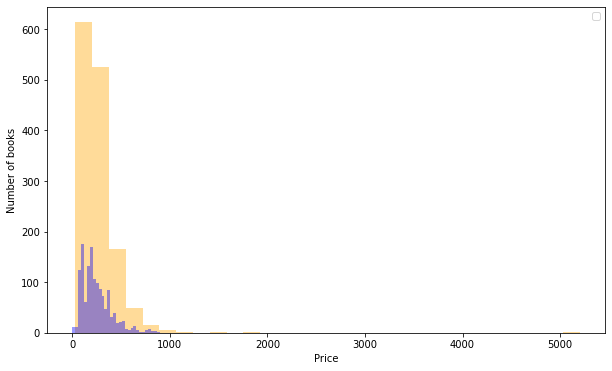

In [193]:
plt.figure(figsize=(10,6))
sns.distplot(flip.flipkart_price,color='orange',bins=30,kde=False)
sns.distplot(ama.amazon_price,color='blue',bins=30,kde=False)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of books')

No handles with labels found to put in legend.


Text(0, 0.5, 'Difference')

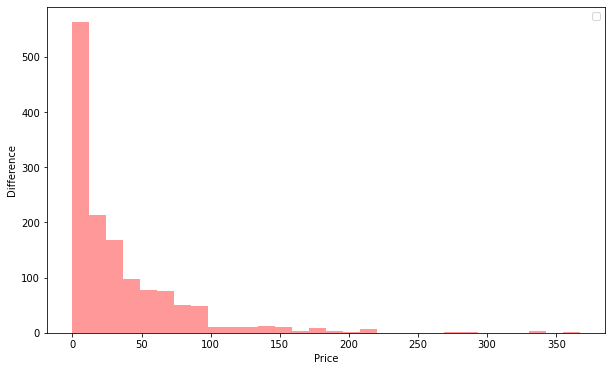

In [194]:
plt.figure(figsize=(10,6))
sns.distplot(abs(ama_flip['price_diff']),color='red',bins=30,kde=False)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Difference')

In [197]:
print(ama_flip.price_diff.max())

367


In [198]:
ama_flip.loc[ama_flip.price_diff == 367]

,amazon_price,Author,BN,Title,flipkart_price,price_diff
1265,328,Keith Brown,8131733661,Hughes Electrical and Electronic Technology 1...,975,367


No handles with labels found to put in legend.


Text(0, 0.5, 'Price Difference')

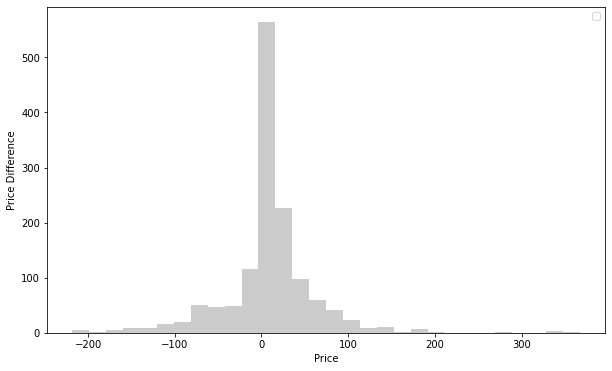

In [199]:
plt.figure(figsize=(10,6))
sns.distplot(ama_flip.price_diff,color='grey',bins=30,kde=False)
#sns.distplot(ama.amazon_price,color='blue',bins=30,kde=False)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Price Difference')